
# Analyzing a real world data-set with SQL and Python


## Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this project, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Connect to the database

Let us first load the SQL extension and establish a connection with the database

##### The syntax for connecting to magic sql using sqllite is

  **%sql sqlite://DatabaseName**   
  
where DatabaseName will be your **.db** file 


In [ ]:
!pip install ipython-sql
!pip install seaborn
import seaborn as sns
%load_ext sql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 199.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 138.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 170.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 147.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 148.0 MB/s eta 0:00:00


In [ ]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install pandas 

In [ ]:
%sql sqlite:///socioeconomic.db

### Store the dataset in a Table

##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the csv files  from the given url  into pandas dataframes

##### Next we will be using the  df.to_sql() function to convert each csv file  to a table in sqlite  with the csv data loaded in it.



In [ ]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")


78

In [ ]:
# Install the 'ipython-sql' and 'prettytable' libraries using pip
!pip install ipython-sql prettytable

# Import the 'prettytable' library, which is used to display data in a formatted table
import prettytable

# Set the default display format for prettytable to 'DEFAULT' (i.e., a simple table format)
prettytable.DEFAULT = 'DEFAULT'

##### You can verify that the table creation was successful by making a basic query like:


In [ ]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems

### Problem 1

##### How many rows are in the dataset?


In [ ]:
%sql select count(*) from chicago_socioeconomic_data 

 * sqlite:///socioeconomic.db
Done.


count(*)
78


### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?


In [ ]:

%sql select count(community_area_name) from chicago_socioeconomic_data where hardship_index > 50.0

 * sqlite:///socioeconomic.db
Done.


count(community_area_name)
38


### Problem 3

##### What is the maximum value of hardship index in this dataset?


In [ ]:
%sql select max(hardship_index) from chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


max(hardship_index)
98.0


### Problem 4

##### Which community area which has the highest hardship index?


In [ ]:
%sql select community_area_name from chicago_socioeconomic_data  where hardship_index = (select max(hardship_index) from chicago_socioeconomic_data )

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?


In [ ]:
%sql select community_area_name from chicago_socioeconomic_data where per_capita_income_>60000

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


 * sqlite:///socioeconomic.db
Done.


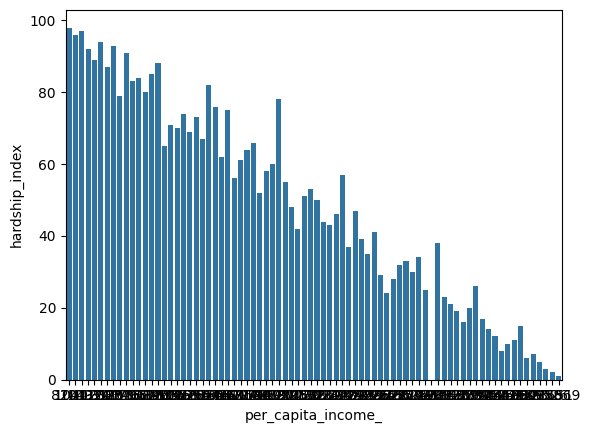

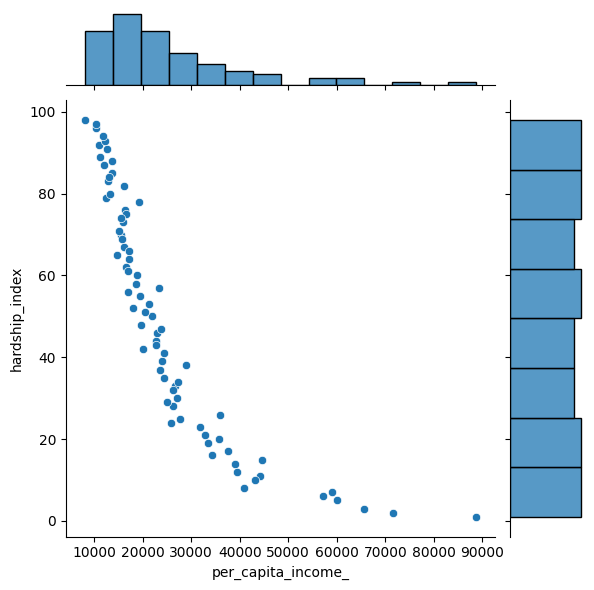

In [ ]:
!pip install seaborn
!pip install matplotlib

%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
# !pip install seaborn==0.9.0
#import seaborn
income_vs_hardship = %sql select per_capita_income_,hardship_index from chicago_socioeconomic_data; 
#income_vs_hardship 
#datafr = income_vs_hardship.DataFrame()

plot = seaborn.barplot(x='per_capita_income_',y='hardship_index',data=income_vs_hardship.DataFrame())
plot3 = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

#plot = seaborn.barplot(x='Test_Score',y='Frequency', data=dataframe)

## Summary

##### In this code we scraped data set from the internet in a database, gain insights into data using SQL queries. Also visualized a portion of the data in the database to see what story it tells.


## Author

<div class="alert alert-block alert-info" style="margin-top:20px;background-color:white; color:black;font-size:16px;">
<div class="row">
<div class="col-md-12">

<div class="col-md-6">
<p> <a href="https://github.com/luqman-cheema" target="_blank">Luqman Cheema</a>, a certified AI & Data professional, senior application developer, holds Master degree in Information Technology, besides, he works with technology and business leaders to resolve complex business problems. He has a strong background in software design & development, implementation & cloud migration, system integration, delivering end-to-end software solutions for various sectors, such as public, private, and multinational organizations.
   </p> <div class="row">
<p><a href="https://www.linkedin.com/in/luqman-cheema/" target="_blank">LinkedIn</a></p>
</div>
</div>
<div class="col-md-3">
 <img src="https://avatars.githubusercontent.com/u/14842482?v=4" height="100" width="100" /> </div>
</div>
</div>

<hr>